In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import os
import random
import shutil
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline

In [3]:
os.chdir("C:\\Users\\Vivek K N\\Dogs-vs-Cats Dataset\\Dogs-vs-Cats")

In [4]:
train_path = "C:\\Users\\Vivek K N\\Dogs-vs-Cats Dataset\\Dogs-vs-Cats\\train"
valid_path = "C:\\Users\\Vivek K N\\Dogs-vs-Cats Dataset\\Dogs-vs-Cats\\valid"
test_path = "C:\\Users\\Vivek K N\\Dogs-vs-Cats Dataset\\Dogs-vs-Cats\\test"

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size = (224, 224), classes = ["cat", "dog"], batch_size = 10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size = (224, 224), classes = ["cat", "dog"], batch_size = 10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size = (224, 224), classes = ["cat", "dog"], batch_size = 10, shuffle=False)

Found 3500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
assert train_batches.n == 3500
assert test_batches.n == 100
assert valid_batches.n == 200
assert train_batches.num_classes == test_batches.num_classes == valid_batches.num_classes == 2

In [7]:
img, labels = next(train_batches)

In [8]:
def plotImages(images_array):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_array, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

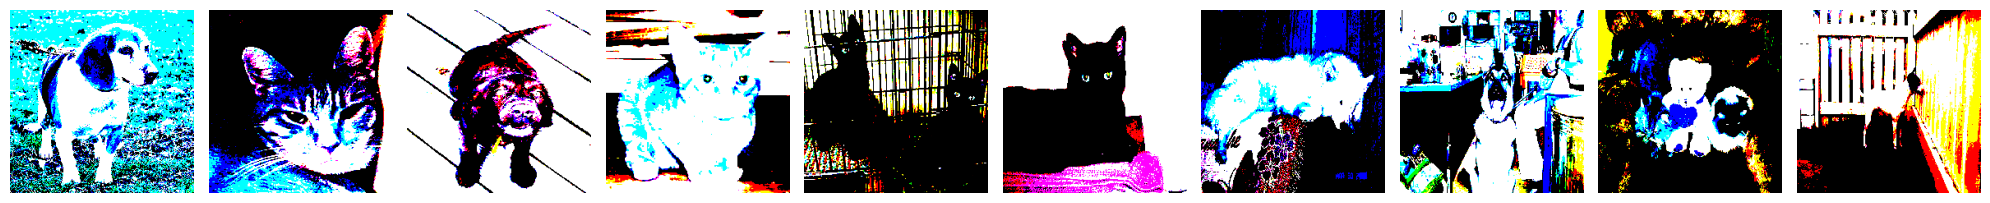

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [9]:
plotImages(img)
print(labels)

# Build and Train CNN

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same", input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units=2, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [12]:
model.compile(optimizer=Adam(learning_rate= 0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
350/350 - 44s - loss: 9.9649 - accuracy: 0.6480 - val_loss: 2.0003 - val_accuracy: 0.6800 - 44s/epoch - 126ms/step
Epoch 2/10
350/350 - 43s - loss: 0.5893 - accuracy: 0.8463 - val_loss: 1.8087 - val_accuracy: 0.6100 - 43s/epoch - 123ms/step
Epoch 3/10
350/350 - 43s - loss: 0.1153 - accuracy: 0.9597 - val_loss: 2.1785 - val_accuracy: 0.6450 - 43s/epoch - 123ms/step
Epoch 4/10
350/350 - 44s - loss: 0.0263 - accuracy: 0.9934 - val_loss: 2.2038 - val_accuracy: 0.6350 - 44s/epoch - 126ms/step
Epoch 5/10
350/350 - 44s - loss: 0.0067 - accuracy: 0.9994 - val_loss: 1.9968 - val_accuracy: 0.6450 - 44s/epoch - 126ms/step
Epoch 6/10
350/350 - 44s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.0460 - val_accuracy: 0.6450 - 44s/epoch - 126ms/step
Epoch 7/10
350/350 - 48s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2221 - val_accuracy: 0.6400 - 48s/epoch - 137ms/step
Epoch 8/10
350/350 - 45s - loss: 9.5917e-04 - accuracy: 1.0000 - val_loss: 2.2306 - val_accuracy: 0.6350 - 45s/epoch -

# Prediction

In [14]:
test_img, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

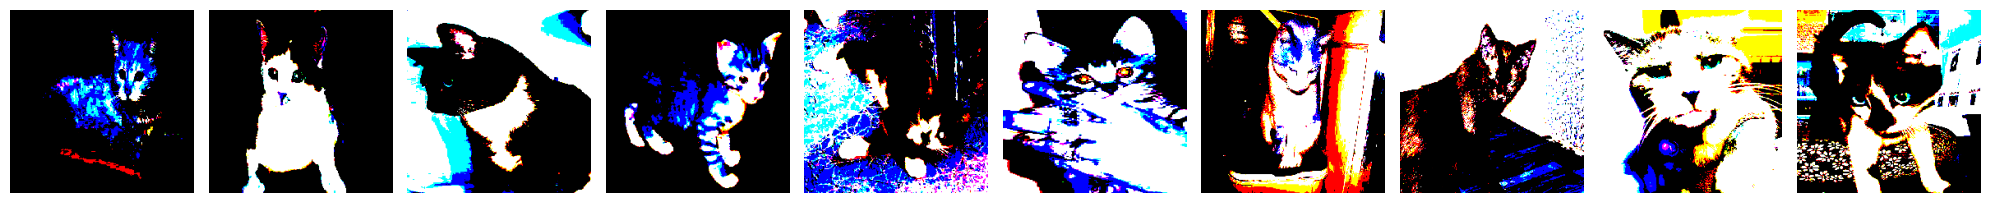

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
plotImages(test_img)
print(test_labels)

In [16]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
predictions = model.predict(x=test_batches, verbose=0)

In [18]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred=np.argmax(predictions, axis=1))

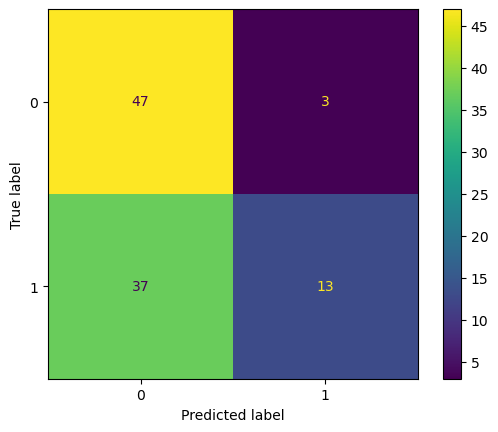

In [19]:
ConfusionMatrixDisplay(cm).plot()

# Build Fine Tuned VGG16 Model

In [20]:
VGG16_Model = tf.keras.applications.vgg16.VGG16()

In [21]:
VGG16_Model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {"non_trainable_params" : non_trainable_params, "trainable_params" : trainable_params}

In [23]:
params = count_params(VGG16_Model)
assert params["non_trainable_params"] == 0
assert params["trainable_params"] == 138357544

In [24]:
model = Sequential()
for layers in VGG16_Model.layers[:-1]:
    model.add(layers)

In [25]:
for layer in model.layers:
    layer.trainable = False

In [26]:
model.add(Dense(units=2, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

# Training VGG16 Model

In [28]:
model.compile(optimizer=Adam(learning_rate = 0.0001), loss="categorical_crossentropy", metrics = ['accuracy'])

In [29]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=4, verbose=2)

Epoch 1/4
350/350 - 195s - loss: 0.1823 - accuracy: 0.9280 - val_loss: 0.0653 - val_accuracy: 0.9900 - 195s/epoch - 557ms/step
Epoch 2/4
350/350 - 193s - loss: 0.0461 - accuracy: 0.9849 - val_loss: 0.0615 - val_accuracy: 0.9750 - 193s/epoch - 550ms/step
Epoch 3/4
350/350 - 192s - loss: 0.0309 - accuracy: 0.9917 - val_loss: 0.0599 - val_accuracy: 0.9750 - 192s/epoch - 548ms/step
Epoch 4/4
350/350 - 192s - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0712 - val_accuracy: 0.9750 - 192s/epoch - 547ms/step


# Predictions of VGG16 Model

In [30]:
predictions = model.predict(x=test_batches, verbose=0)

In [31]:
cm = confusion_matrix(y_true = test_batches.classes, y_pred = np.argmax
                      (predictions, axis=1))

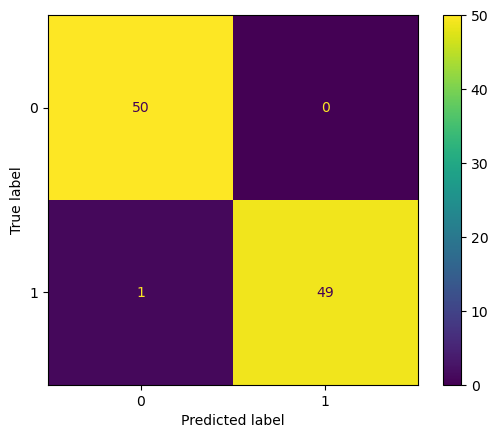

In [32]:
ConfusionMatrixDisplay(cm).plot()

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_batches.classes, np.argmax(predictions, axis=1))

In [34]:
print(f"{accuracy*100} %")

99.0 %
